In [149]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
from pathlib import Path 

%matplotlib inline

In [150]:
# Load CSV file
brewery_data_csv = Path("breweries_complete.csv")

In [151]:
# Read data file and store it in DataFrame
breweries_complete = pd.read_csv(brewery_data_csv, skipinitialspace=True)
breweries_complete

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6
...,...,...,...,...,...,...,...,...,...,...,...
7927,Zebulon Artisan Ales,micro,8 Merchents Alley,Weaverville,North Carolina,28787-8860,-82.554475,35.715670,North Carolina,28787,7914
7928,Zephyr Brewing Co,micro,1609 E 58th Ave Ste G,Denver,Colorado,80216-1528,-104.981909,39.779835,Colorado,80216,7916
7929,Zero Gravity Craft Brewery,micro,716 Pinte Street,Burlington,Vermont,05401,-73.211024,44.474836,Vermont,05401,7918
7930,Zum Bier,micro,3232 E Monroe St,Waukegan,Illinois,60085,-87.861975,42.358933,Illinois,60085,7930


### Clean data by fixing misspelled and/or removing rows that will not sum 

In [152]:
# Fix misspelling "MIssouri" in state column and remove brewery_id 1986 (displays separately from rest of "Washington" data)
breweries_complete["state"] = np.where(breweries_complete["state"] == "MIssouri", "Missouri", breweries_complete["state"])
breweries_complete = breweries_complete.loc[breweries_complete["brewery_id"] != 1986]
breweries_complete

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6
...,...,...,...,...,...,...,...,...,...,...,...
7927,Zebulon Artisan Ales,micro,8 Merchents Alley,Weaverville,North Carolina,28787-8860,-82.554475,35.715670,North Carolina,28787,7914
7928,Zephyr Brewing Co,micro,1609 E 58th Ave Ste G,Denver,Colorado,80216-1528,-104.981909,39.779835,Colorado,80216,7916
7929,Zero Gravity Craft Brewery,micro,716 Pinte Street,Burlington,Vermont,05401,-73.211024,44.474836,Vermont,05401,7918
7930,Zum Bier,micro,3232 E Monroe St,Waukegan,Illinois,60085,-87.861975,42.358933,Illinois,60085,7930


## Total breweries across all types per state

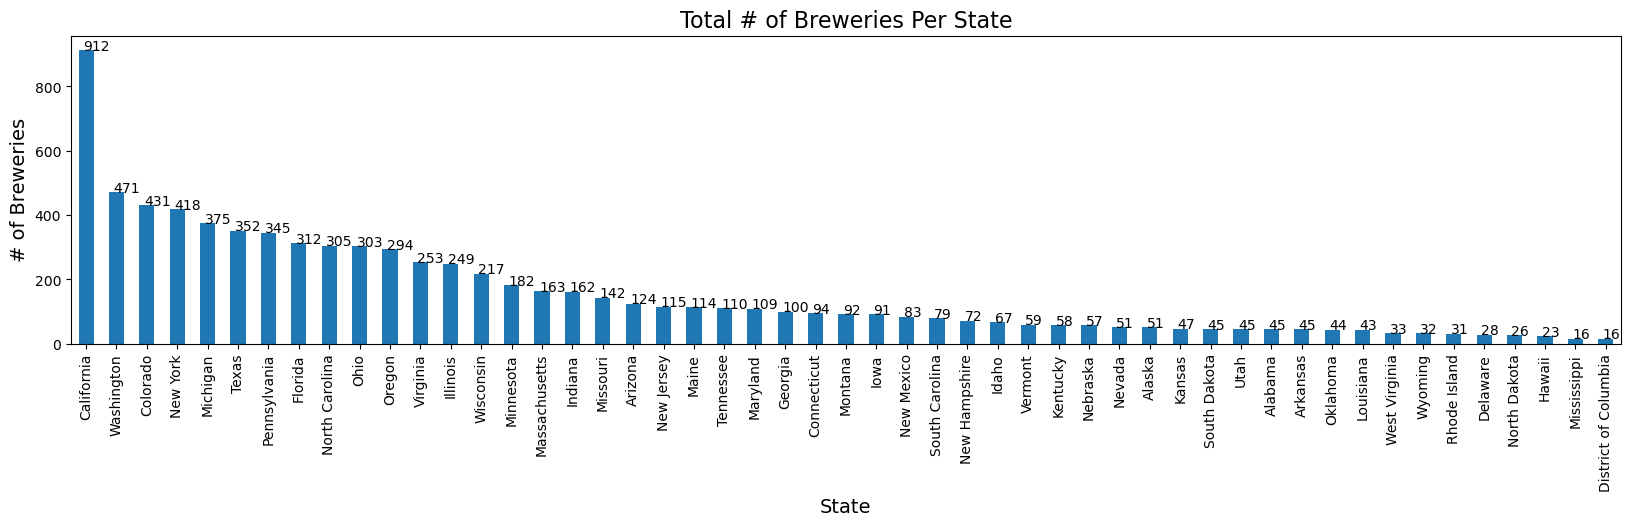

In [153]:
# Generate a bar plot showing total number of breweries by state 
brew_by_state = breweries_complete.groupby(["state"])["brewery_type"].count()
brew_by_state = brew_by_state.sort_values(ascending=False)
brew_by_state_df = pd.DataFrame(brew_by_state)

# Display bar plot
brew_chart = brew_by_state_df.plot(kind="bar", figsize=(20,4), legend=False)

# add value counts above each bar
for i in range(len(brew_by_state_df)):
    plt.text(x=i-0.1 , y=brew_by_state_df.iloc[i,0]+0.5, s=brew_by_state_df.iloc[i,0], size=10)

# label x and y, apply formatting 
brew_chart.set_title("Total # of Breweries Per State", fontsize=16)
brew_chart.set_xlabel("State", fontsize=14)
brew_chart.set_ylabel("# of Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total "open"-type breweries per state

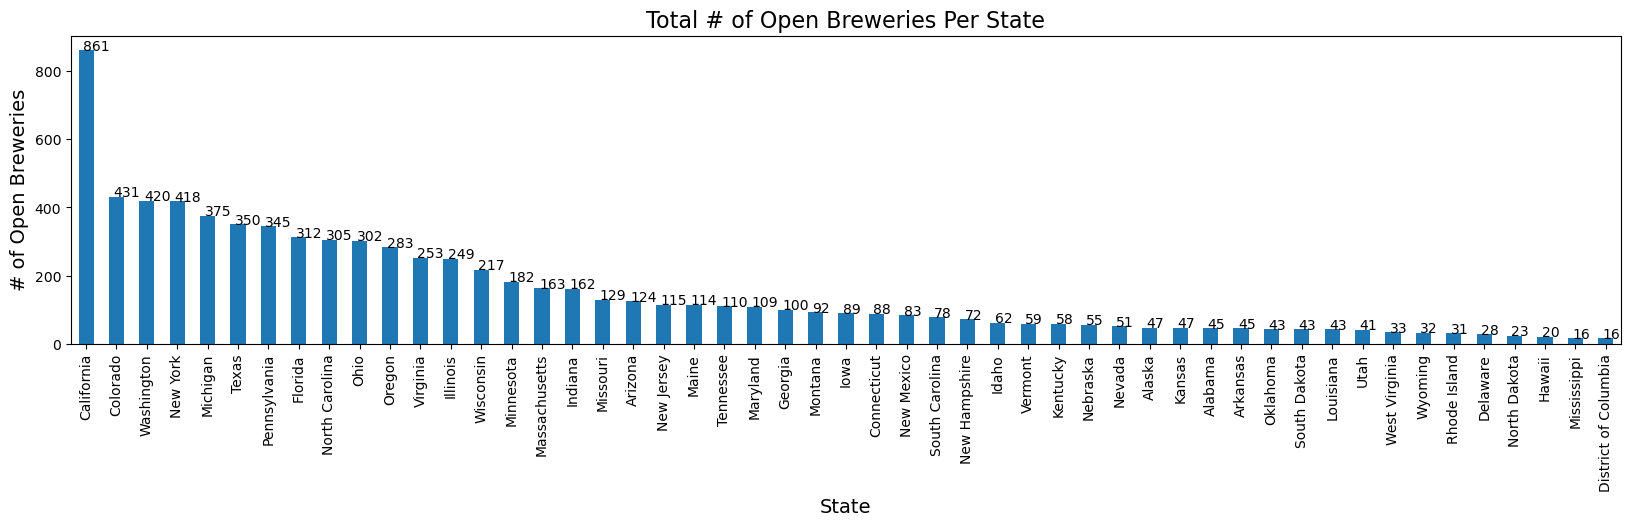

In [154]:
# Remove data of closed breweries 
open_breweries = breweries_complete[breweries_complete.brewery_type != "closed"]

# Generate a bar plot showing total number of open breweries by state 
open_brew_by_state = open_breweries.groupby(["state"])["brewery_type"].count()
open_brew_by_state = open_brew_by_state.sort_values(ascending=False)
open_breweries_df = pd.DataFrame(open_brew_by_state)

# Display bar plot
open_brew_chart = open_breweries_df.plot(kind="bar", figsize=(20,4), legend=False)

# add value counts above each bar
for i in range(len(open_breweries_df)):
    plt.text(x=i-0.1 , y=open_breweries_df.iloc[i,0]+0.5, s=open_breweries_df.iloc[i,0], size=10)

# label x and y, apply formatting 
open_brew_chart.set_title("Total # of Open Breweries Per State", fontsize=16)
open_brew_chart.set_xlabel("State", fontsize=14)
open_brew_chart.set_ylabel("# of Open Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/open_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total closed breweries per state

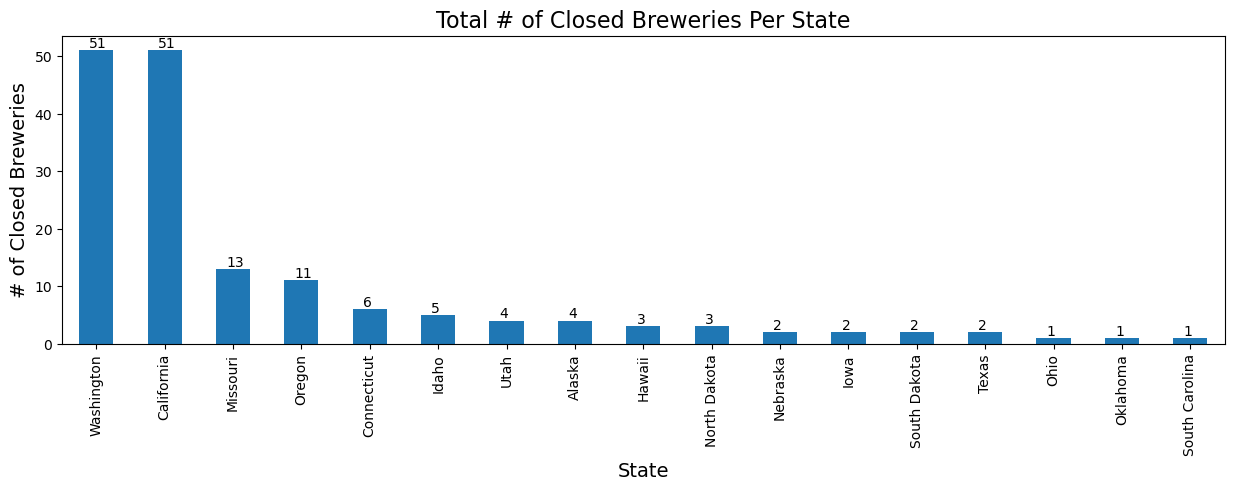

In [155]:
# Pull data for closed breweries 
closed_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "closed"]

# Generate a bar plot showing total number of closed breweries by state 
closed_brew_by_state = closed_breweries.groupby(["state"])["brewery_type"].count()
closed_brew_by_state = closed_brew_by_state.sort_values(ascending=False)
closed_breweries_df = pd.DataFrame(closed_brew_by_state)

# Display bar plot
closed_brew_chart = closed_breweries_df.plot(kind="bar", figsize=(15,4), legend=False)

# add value counts above each bar
for i in range(len(closed_breweries_df)):
    plt.text(x=i-0.1 , y=closed_breweries_df.iloc[i,0]+0.5, s=closed_breweries_df.iloc[i,0], size=10)

# label x and y, apply formatting 
closed_brew_chart.set_title("Total # of Closed Breweries Per State", fontsize=16)
closed_brew_chart.set_xlabel("State", fontsize=14)
closed_brew_chart.set_ylabel("# of Closed Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/closed_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total planned breweries per state

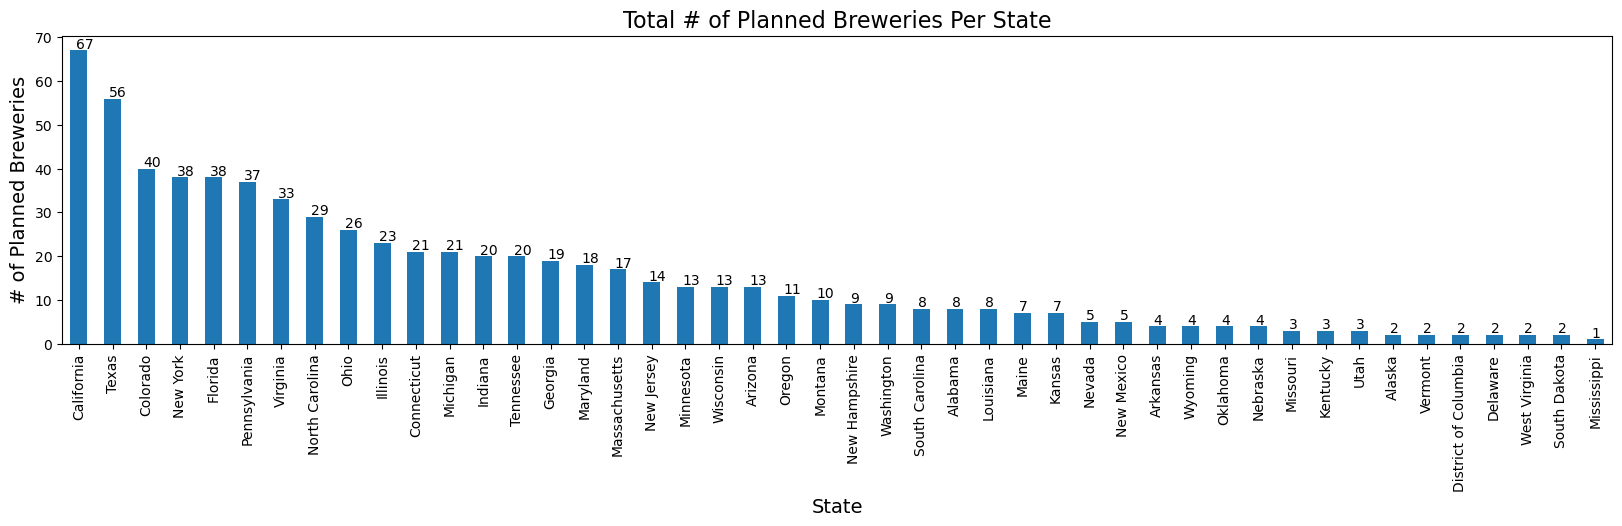

In [156]:
# Pull data for planned breweries
planned_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "planning"]

# Generate a bar plot showing total number of closed breweries by state 
planned_brew_by_state = planned_breweries.groupby(["state"])["brewery_type"].count()
planned_brew_by_state = planned_brew_by_state.sort_values(ascending=False)
planned_breweries_df = pd.DataFrame(planned_brew_by_state)

# Display bar plot, label x and y, apply formatting 
planned_brew_chart = planned_breweries_df.plot(kind="bar", figsize=(20,4), legend=False)

# add value counts above each bar
for i in range(len(planned_breweries_df)):
    plt.text(x=i-0.1 , y=planned_breweries_df.iloc[i,0]+0.5, s=planned_breweries_df.iloc[i,0], size=10)

planned_brew_chart.set_title("Total # of Planned Breweries Per State", fontsize=16)
planned_brew_chart.set_xlabel("State", fontsize=14)
planned_brew_chart.set_ylabel("# of Planned Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/planned_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Stacked bar plot of brewery-types (no closed) per state

In [157]:
# Identify number of closed breweries in comparison to other types 
breweries_complete["brewery_type"].value_counts()

micro         4114
brewpub       2395
planning       701
regional       213
contract       196
closed         162
large           74
proprietor      69
nano             5
bar              2
Name: brewery_type, dtype: int64

In [158]:
# Drop closed breweries from dataset 
open_planned_breweries = breweries_complete[breweries_complete.brewery_type != "closed"]

# Output csv of only open or planned breweries  
open_planned_breweries.to_csv("breweries_open_planned.csv", index=False)
open_planned_breweries

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6
...,...,...,...,...,...,...,...,...,...,...,...
7927,Zebulon Artisan Ales,micro,8 Merchents Alley,Weaverville,North Carolina,28787-8860,-82.554475,35.715670,North Carolina,28787,7914
7928,Zephyr Brewing Co,micro,1609 E 58th Ave Ste G,Denver,Colorado,80216-1528,-104.981909,39.779835,Colorado,80216,7916
7929,Zero Gravity Craft Brewery,micro,716 Pinte Street,Burlington,Vermont,05401,-73.211024,44.474836,Vermont,05401,7918
7930,Zum Bier,micro,3232 E Monroe St,Waukegan,Illinois,60085,-87.861975,42.358933,Illinois,60085,7930


In [159]:
# Using example from team member Natalia Lopez, count brewery type per state 
open_planned_by_state = open_planned_breweries.groupby(["state", "brewery_type"])["brewery_type"].count()
open_planned_by_state

state    brewery_type
Alabama  brewpub          4
         contract         1
         micro           32
         planning         8
Alaska   brewpub         14
                         ..
Wyoming  brewpub         12
         contract         1
         micro           14
         planning         4
         regional         1
Name: brewery_type, Length: 281, dtype: int64

In [160]:
# Index brewery type per state 
open_planned_by_state_index = open_planned_by_state.index
open_planned_by_state_index

MultiIndex([(  'Alabama',    'brewpub'),
            (  'Alabama',   'contract'),
            (  'Alabama',      'micro'),
            (  'Alabama',   'planning'),
            (   'Alaska',    'brewpub'),
            (   'Alaska',   'contract'),
            (   'Alaska',      'micro'),
            (   'Alaska',   'planning'),
            (   'Alaska',   'regional'),
            (  'Arizona',    'brewpub'),
            ...
            ('Wisconsin',      'micro'),
            ('Wisconsin',       'nano'),
            ('Wisconsin',   'planning'),
            ('Wisconsin', 'proprietor'),
            ('Wisconsin',   'regional'),
            (  'Wyoming',    'brewpub'),
            (  'Wyoming',   'contract'),
            (  'Wyoming',      'micro'),
            (  'Wyoming',   'planning'),
            (  'Wyoming',   'regional')],
           names=['state', 'brewery_type'], length=281)

In [161]:
# Convert index of brewery type per state and replace nan with 0 
open_planned_by_state_index2 = open_planned_by_state.unstack()
open_planned_by_state_index3 = open_planned_by_state_index2.fillna(0)
open_planned_by_state_index3

brewery_type,bar,brewpub,contract,large,micro,nano,planning,proprietor,regional
state,,,,,,,,,
Alabama,0.0,4.0,1.0,0.0,32.0,0.0,8.0,0.0,0.0
Alaska,0.0,14.0,1.0,0.0,29.0,0.0,2.0,0.0,1.0
Arizona,0.0,46.0,4.0,2.0,58.0,0.0,13.0,0.0,1.0
Arkansas,0.0,18.0,1.0,0.0,22.0,0.0,4.0,0.0,0.0
California,0.0,249.0,27.0,15.0,461.0,0.0,67.0,13.0,29.0
Colorado,0.0,138.0,9.0,7.0,222.0,0.0,40.0,4.0,11.0
Connecticut,0.0,11.0,5.0,0.0,49.0,0.0,21.0,0.0,2.0
Delaware,0.0,14.0,0.0,1.0,10.0,0.0,2.0,0.0,1.0
District of Columbia,0.0,6.0,2.0,0.0,5.0,0.0,2.0,0.0,1.0


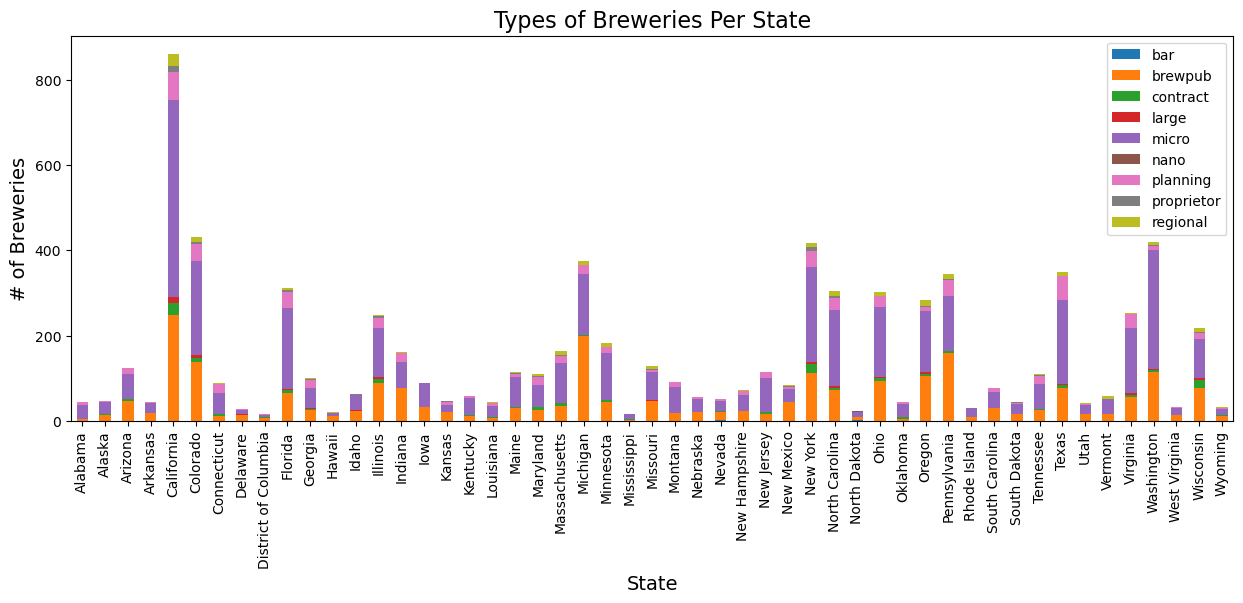

In [162]:
# Display bar plot, label x and y, apply formatting 
stacked_chart = open_planned_by_state_index3.plot(kind="bar", stacked=True, figsize=(15,5))
stacked_chart.set_title("Types of Breweries Per State", fontsize=16)
stacked_chart.set_xlabel("State", fontsize=14)
stacked_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/breweries_types_per_state.png", bbox_inches="tight")
plt.show()

## Grouped bar plot of micro and brewpubs per state

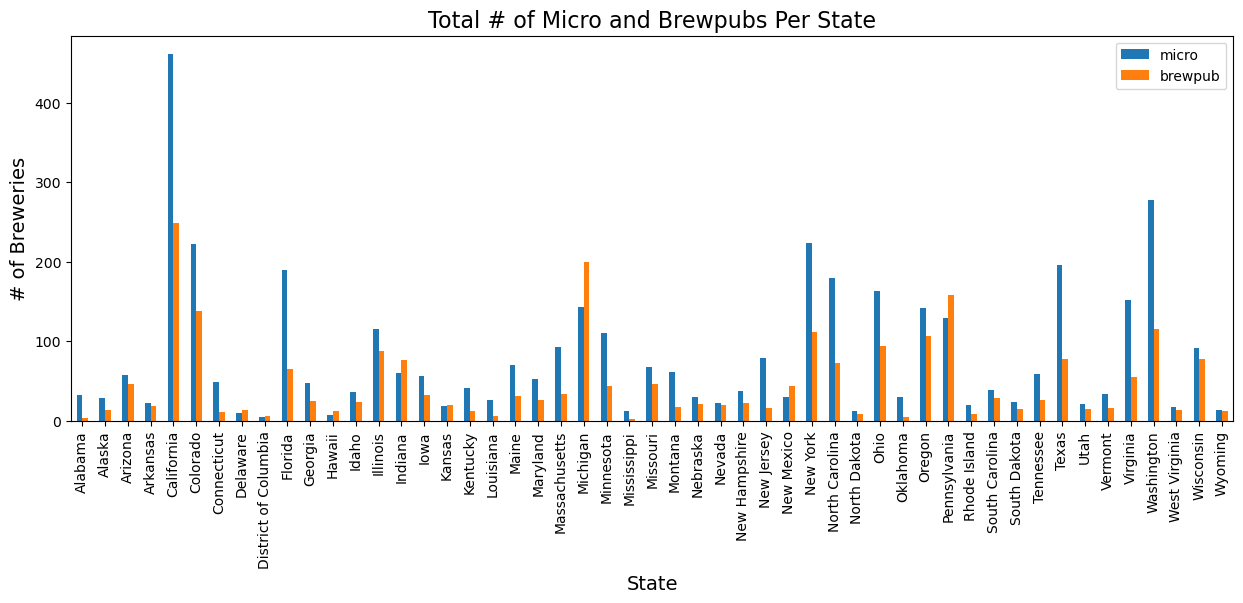

In [163]:
# new DataFrame with only micro and brewpub columns 
micro_brewpub = open_planned_by_state_index3[["micro", "brewpub"]]

# Display bar plot, label x and y, apply formatting 
micro_brewpub_chart = micro_brewpub.plot(kind="bar", figsize=(15,5))

# add value counts above each bar
#for i in range(len(open_planned_by_state_index3)):
    #plt.text(x=i-0.1 , y=open_planned_by_state_index3.iloc[i,0]+0.5, s=open_planned_by_state_index3.iloc[i,0], size=10)

micro_brewpub_chart.set_title("Total # of Micro and Brewpubs Per State", fontsize=16)
micro_brewpub_chart.set_xlabel("State", fontsize=14)
micro_brewpub_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/micro_brewpubs_per_state.png", bbox_inches="tight")
plt.show()

## Stacked bar plot of 5 states with most micro and brewpubs 

In [164]:
# Filter columns to only show micro and brewpub 
micro_brewpub = open_planned_by_state_index3[["micro", "brewpub"]]
micro_brewpub

brewery_type,micro,brewpub
state,,
Alabama,32.0,4.0
Alaska,29.0,14.0
Arizona,58.0,46.0
Arkansas,22.0,18.0
California,461.0,249.0
Colorado,222.0,138.0
Connecticut,49.0,11.0
Delaware,10.0,14.0
District of Columbia,5.0,6.0


In [165]:
# create new DataFrame with only micro and brewpub columns and reset index to get state into separate column 
micro_brewpub = open_planned_by_state_index3[["micro", "brewpub"]]
micro_brewpub_df = pd.DataFrame(micro_brewpub)
micro_brewpub_reset = micro_brewpub_df.reset_index()
micro_brewpub_reset

brewery_type,state,micro,brewpub
0,Alabama,32.0,4.0
1,Alaska,29.0,14.0
2,Arizona,58.0,46.0
3,Arkansas,22.0,18.0
4,California,461.0,249.0
5,Colorado,222.0,138.0
6,Connecticut,49.0,11.0
7,Delaware,10.0,14.0
8,District of Columbia,5.0,6.0
9,Florida,190.0,65.0


In [166]:
# Add total number of micro and brewpubs to each state row and display data in descending number of breweries
sum_column = micro_brewpub_reset["micro"] + micro_brewpub_reset["brewpub"]
micro_brewpub_reset["Total"] = sum_column
sorted_count = micro_brewpub_reset.sort_values(by=["Total"], ascending=False)
sorted_count

brewery_type,state,micro,brewpub,Total
4,California,461.0,249.0,710.0
47,Washington,278.0,115.0,393.0
5,Colorado,222.0,138.0,360.0
22,Michigan,143.0,199.0,342.0
32,New York,224.0,111.0,335.0
38,Pennsylvania,129.0,158.0,287.0
43,Texas,196.0,77.0,273.0
35,Ohio,163.0,94.0,257.0
9,Florida,190.0,65.0,255.0
33,North Carolina,179.0,72.0,251.0


In [167]:
# Filter data to only show for 5 states with most micro + brewpubs 
top_states = open_planned_by_state_index3.loc[["California", "Washington", "Colorado", "Michigan", "New York"]]
top_states

brewery_type,bar,brewpub,contract,large,micro,nano,planning,proprietor,regional
state,,,,,,,,,
California,0.0,249.0,27.0,15.0,461.0,0.0,67.0,13.0,29.0
Washington,0.0,115.0,4.0,3.0,278.0,2.0,9.0,2.0,7.0
Colorado,0.0,138.0,9.0,7.0,222.0,0.0,40.0,4.0,11.0
Michigan,0.0,199.0,3.0,0.0,143.0,0.0,21.0,0.0,9.0
New York,0.0,111.0,22.0,4.0,224.0,0.0,38.0,10.0,9.0


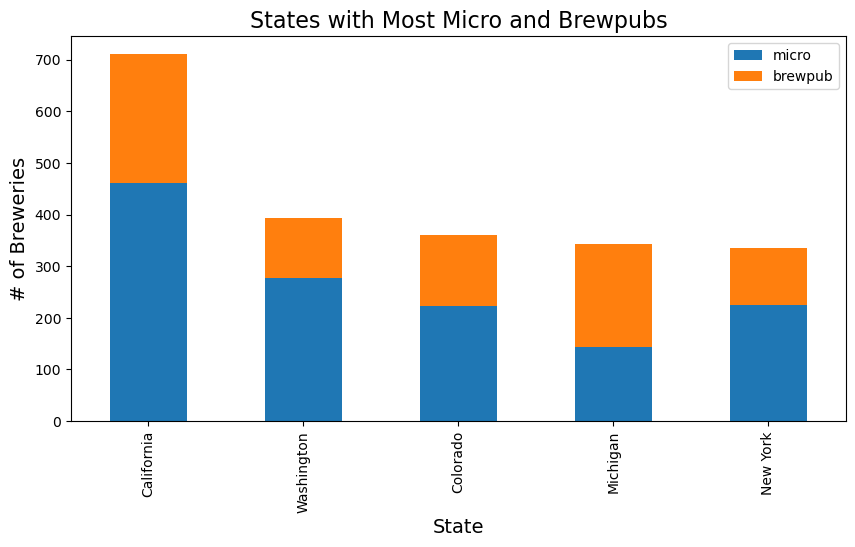

In [168]:
# Display bar plot, label x and y, apply formatting 
y = []
top_states_chart = top_states.plot(kind="bar", y=["micro", "brewpub"], stacked=True, figsize=(10,5))
top_states_chart.set_title("States with Most Micro and Brewpubs", fontsize=16)
top_states_chart.set_xlabel("State", fontsize=14)
top_states_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/top_states_micro_brewpubs.png", bbox_inches="tight")
plt.show()

## Stacked bar plot of 5 states with least micro and brewpubs 

### Excluded DC as it technically is not a state 

In [169]:
# Filter data to only show for 5 states with least micro + brewpubs 
bottom_states = open_planned_by_state_index3.loc[["Wyoming", "Delaware", "North Dakota", "Hawaii", "Mississippi"]]
bottom_states

brewery_type,bar,brewpub,contract,large,micro,nano,planning,proprietor,regional
state,,,,,,,,,
Wyoming,0.0,12.0,1.0,0.0,14.0,0.0,4.0,0.0,1.0
Delaware,0.0,14.0,0.0,1.0,10.0,0.0,2.0,0.0,1.0
North Dakota,1.0,8.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0
Hawaii,0.0,12.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0
Mississippi,0.0,2.0,1.0,0.0,12.0,0.0,1.0,0.0,0.0


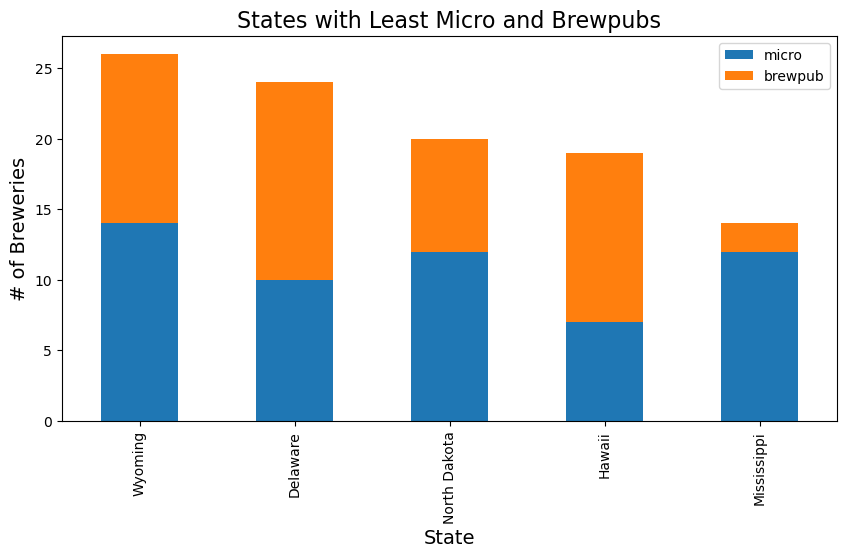

In [170]:
# Display bar plot, label x and y, apply formatting 
y = []
bottom_states_chart = bottom_states.plot(kind="bar", y=["micro", "brewpub"], stacked=True, figsize=(10,5))
bottom_states_chart.set_title("States with Least Micro and Brewpubs", fontsize=16)
bottom_states_chart.set_xlabel("State", fontsize=14)
bottom_states_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/tail_states_micro_brewpubs.png", bbox_inches="tight")
plt.show()

## Stacked bar plot of three cities within top state that have the most micro and brewpubs  

In [171]:
# Filter complete data by California (top) and Mississippi (tail)
top_tail_states = breweries_complete.loc[(breweries_complete["state"] == "California") | (breweries_complete["state"] == "Mississippi")]
top_tail_states2 = top_tail_states[["brewery_type", "city", "state"]]
top_tail_states2_df = pd.DataFrame(top_tail_states1)
top_tail_states2_df

,brewery_type,city,state
1,large,San Diego,California
11,closed,Petaluma,California
23,micro,Westlake Village,California
31,micro,okolona,Mississippi
33,micro,Mariposa,California
...,...,...,...
6857,micro,Starkville,Mississippi
6888,micro,Greenville,Mississippi
7336,brewpub,San Diego,California
7428,contract,Los Angeles,California


In [172]:
# Narrow filtered data for CA and MS down to only those that have micro/brewpubs 
micro_brewpub_city = top_tail_states2_df.loc[(top_tail_states1_df["brewery_type"] == "micro") | (top_tail_states1_df["brewery_type"] == "brewpub")]
micro_brewpub_city_df = pd.DataFrame(micro_brewpub_city)
micro_brewpub_city_df

,brewery_type,city,state
23,micro,Westlake Village,California
31,micro,okolona,Mississippi
33,micro,Mariposa,California
44,brewpub,Santa Rosa,California
51,brewpub,San Francisco,California
...,...,...,...
6117,brewpub,Ocean Springs,Mississippi
6162,brewpub,Hesperia,California
6857,micro,Starkville,Mississippi
6888,micro,Greenville,Mississippi


In [173]:
# Count brewery type per city 
city_concentration = micro_brewpub_city_df.groupby(["state", "city", "brewery_type"])["brewery_type"].count()
city_concentration

state        city             brewery_type
California   Agoura Hills     brewpub         2
             Alameda          micro           3
             Alamo            micro           1
             Aliso Viejo      brewpub         1
             American Canyon  brewpub         1
                                             ..
Mississippi  Ocean Springs    micro           1
             Starkville       micro           1
             Vicksburg        brewpub         1
             Water Valley     micro           1
             okolona          micro           1
Name: brewery_type, Length: 359, dtype: int64

In [174]:
# Index brewery type per city 
city_concentration_index = city_concentration.index
city_concentration_index

MultiIndex([( 'California',    'Agoura Hills', 'brewpub'),
            ( 'California',         'Alameda',   'micro'),
            ( 'California',           'Alamo',   'micro'),
            ( 'California',     'Aliso Viejo', 'brewpub'),
            ( 'California', 'American Canyon', 'brewpub'),
            ( 'California',         'Anaheim', 'brewpub'),
            ( 'California',         'Anaheim',   'micro'),
            ( 'California',    'Apple Valley', 'brewpub'),
            ( 'California',    'Apple Valley',   'micro'),
            ( 'California',         'Arcadia',   'micro'),
            ...
            ('Mississippi',         'Jackson',   'micro'),
            ('Mississippi',            'Kiln',   'micro'),
            ('Mississippi',          'Laurel',   'micro'),
            ('Mississippi',         'Natchez',   'micro'),
            ('Mississippi',   'Ocean Springs', 'brewpub'),
            ('Mississippi',   'Ocean Springs',   'micro'),
            ('Mississippi',      'Starkv

In [183]:
# Convert index of brewery type per city and replace nan with 0 
city_concentration_index2 = city_concentration.unstack()
city_concentration_index3 = city_concentration_index2.fillna(0)
#city_concentration_index3_df = pd.DataFrame(city_concentration_index3)
#city_concentration_reset = city_concentration_index3_df.reset_index()
city_concentration_index3


brewery_type                 brewpub  micro
state       city                           
California  Agoura Hills         2.0    0.0
            Alameda              0.0    3.0
            Alamo                0.0    1.0
            Aliso Viejo          1.0    0.0
            American Canyon      1.0    0.0
...                              ...    ...
Mississippi Ocean Springs        1.0    1.0
            Starkville           0.0    1.0
            Vicksburg            1.0    0.0
            Water Valley         0.0    1.0
            okolona              0.0    1.0

[282 rows x 2 columns]

In [187]:
# Add total number of micro and brewpubs to each city row and display data in descending number of breweries
sum_column2 = city_concentration_index3["micro"] + city_concentration_index3["brewpub"]
city_concentration_index3["Total"] = sum_column2
sorted_count2 = city_concentration_index3.sort_values(by=["Total"], ascending=False)
sorted_count2_df = pd.DataFrame(sorted_count2)
sorted_count2_df

brewery_type                brewpub  micro  Total
state       city                                 
California  San Diego          22.0   45.0   67.0
            San Francisco      17.0   15.0   32.0
            Sacramento          5.0   13.0   18.0
            Los Angeles         6.0   12.0   18.0
            Vista               3.0   11.0   14.0
...                             ...    ...    ...
            Marina              0.0    1.0    1.0
            Marina del Rey      1.0    0.0    1.0
            Mariposa            0.0    1.0    1.0
            McCloud             1.0    0.0    1.0
Mississippi okolona             0.0    1.0    1.0

[282 rows x 3 columns]

In [206]:
# Add total number of micro and brewpubs to each city row and display data in descending number of breweries
sum_column2 = city_concentration_index3["micro"] + city_concentration_index3["brewpub"]
city_concentration_index3["Total"] = sum_column2
sorted_count2 = city_concentration_index3.sort_values(by=["Total"], ascending=False)
sorted_count2_df = pd.DataFrame(sorted_count2)
city_concentration_reset = sorted_count2_df.reset_index()
city_concentration_reset

brewery_type,state,city,brewpub,micro,Total
0,California,San Diego,22.0,45.0,67.0
1,California,San Francisco,17.0,15.0,32.0
2,California,Sacramento,5.0,13.0,18.0
3,California,Los Angeles,6.0,12.0,18.0
4,California,Vista,3.0,11.0,14.0
...,...,...,...,...,...
277,California,Marina,0.0,1.0,1.0
278,California,Marina del Rey,1.0,0.0,1.0
279,California,Mariposa,0.0,1.0,1.0
280,California,McCloud,1.0,0.0,1.0


In [207]:
# Remove state column 
top_cities = city_concentration_reset[["city", "micro", "brewpub", "Total"]]
top_cities

brewery_type,city,micro,brewpub,Total
0,San Diego,45.0,22.0,67.0
1,San Francisco,15.0,17.0,32.0
2,Sacramento,13.0,5.0,18.0
3,Los Angeles,12.0,6.0,18.0
4,Vista,11.0,3.0,14.0
...,...,...,...,...
277,Marina,1.0,0.0,1.0
278,Marina del Rey,0.0,1.0,1.0
279,Mariposa,1.0,0.0,1.0
280,McCloud,0.0,1.0,1.0


In [211]:
# Set city column as index 
top_cities_reset = top_cities.set_index("city")
top_cities_reset

brewery_type,micro,brewpub,Total
city,,,
San Diego,45.0,22.0,67.0
San Francisco,15.0,17.0,32.0
Sacramento,13.0,5.0,18.0
Los Angeles,12.0,6.0,18.0
Vista,11.0,3.0,14.0
...,...,...,...
Marina,1.0,0.0,1.0
Marina del Rey,0.0,1.0,1.0
Mariposa,1.0,0.0,1.0


In [213]:
# Filter data to only show three cities in CA with most micro + brewpubs 
top_cities2 = top_cities_reset.loc[["San Diego","San Francisco", "Los Angeles"]]
top_cities2

brewery_type,micro,brewpub,Total
city,,,
San Diego,45.0,22.0,67.0
San Francisco,15.0,17.0,32.0
Los Angeles,12.0,6.0,18.0


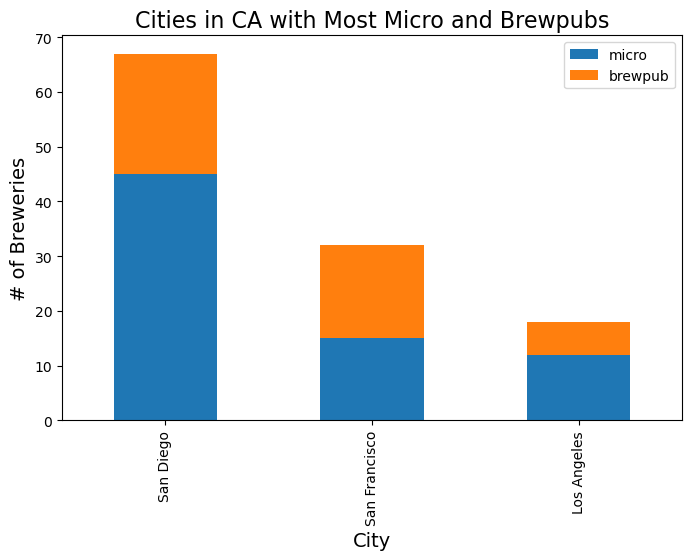

In [216]:
# Display bar plot, label x and y, apply formatting 
y = []
top_cities_chart = top_cities2.plot(kind="bar", y=["micro", "brewpub"], stacked=True, figsize=(8,5))
top_cities_chart.set_title("Cities in CA with Most Micro and Brewpubs", fontsize=16)
top_cities_chart.set_xlabel("City", fontsize=14)
top_cities_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/top_CA_cities_micro_brewpubs.png", bbox_inches="tight")
plt.show()

## Stacked bar plot of three cities within tail state that have the most micro and brewpubs  

In [221]:
# Pull only Mississippi data rows to find top three cities for micro/brewpubs 
city_concentration_reset2 = city_concentration_reset.loc[city_concentration_reset["state"] == "Mississippi"]
city_concentration_reset2

brewery_type,state,city,brewpub,micro,Total
109,Mississippi,Ocean Springs,1.0,1.0,2.0
120,Mississippi,Starkville,0.0,1.0,1.0
121,Mississippi,Vicksburg,1.0,0.0,1.0
130,Mississippi,Water Valley,0.0,1.0,1.0
132,Mississippi,Biloxi,0.0,1.0,1.0
134,Mississippi,Greenville,0.0,1.0,1.0
136,Mississippi,Gulfport,0.0,1.0,1.0
139,Mississippi,Hattiesburg,0.0,1.0,1.0
141,Mississippi,Jackson,0.0,1.0,1.0
142,Mississippi,Kiln,0.0,1.0,1.0


In [224]:
# Drop state coulmn and set city column as index 
tail_cities = city_concentration_reset2.drop(["state"], axis=1)
tail_cities_reset = tail_cities.set_index("city")
tail_cities_reset

brewery_type,brewpub,micro,Total
city,,,
Ocean Springs,1.0,1.0,2.0
Starkville,0.0,1.0,1.0
Vicksburg,1.0,0.0,1.0
Water Valley,0.0,1.0,1.0
Biloxi,0.0,1.0,1.0
Greenville,0.0,1.0,1.0
Gulfport,0.0,1.0,1.0
Hattiesburg,0.0,1.0,1.0
Jackson,0.0,1.0,1.0


In [226]:
# Filter data to only show three cities in MS with most micro + brewpubs 
tail_cities_reset2 = tail_cities_reset.loc[["Ocean Springs", "Starkville", "Vicksburg"]]
tail_cities_reset2

brewery_type,brewpub,micro,Total
city,,,
Ocean Springs,1.0,1.0,2.0
Starkville,0.0,1.0,1.0
Vicksburg,1.0,0.0,1.0


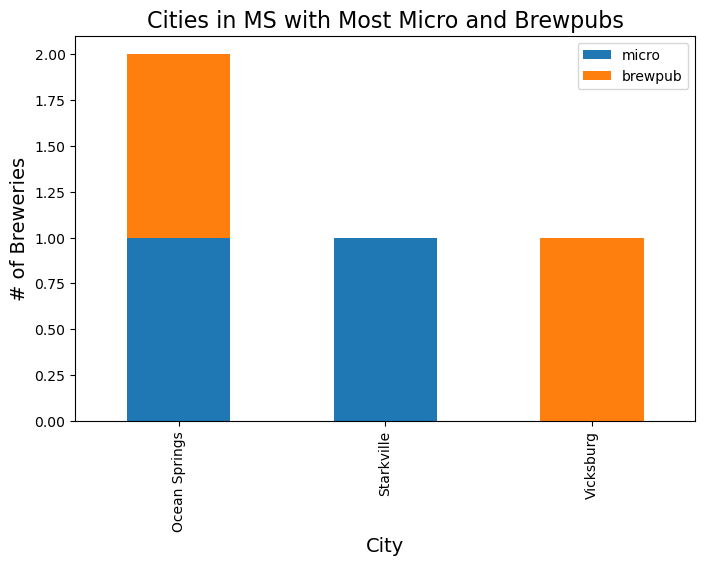

In [228]:
# Display bar plot, label x and y, apply formatting 
y = []
tail_cities_chart = tail_cities_reset2.plot(kind="bar", y=["micro", "brewpub"], stacked=True, figsize=(8,5))
tail_cities_chart.set_title("Cities in MS with Most Micro and Brewpubs", fontsize=16)
tail_cities_chart.set_xlabel("City", fontsize=14)
tail_cities_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/top_MS_cities_micro_brewpubs.png", bbox_inches="tight")
plt.show()

### Code Sources

Cohort member: Natalia Lopez (pivot tables) and Vicky Lasota (adding numbers to columns in bar graphs)

https://www.tutorialspoint.com/python-pandas-how-to-skip-initial-space-from-a-dataframe

https://www.statology.org/pandas-keep-columns/

https://builtin.com/data-science/pandas-pivot-tables

https://www.geeksforgeeks.org/how-to-create-a-pivot-table-in-python-using-pandas/

https://medium.com/@enricobergamini/creating-non-numeric-pivot-tables-with-python-pandas-7aa9dfd788a7

https://pandas.pydata.org/docs/user_guide/reshaping.html

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

https://www.youtube.com/watch?v=tcRGa2soc-c

https://www.statology.org/pandas-pivot-table-sort/

https://www.tutorialspoint.com/how-to-put-a-legend-outside-the-plot-with-pandas

https://www.statology.org/pandas-filter-rows-containing-string/

https://www.youtube.com/watch?v=O4538i9MQEc

https://stackoverflow.com/questions/46431243/pandas-dataframe-groupby-how-to-get-sum-of-multiple-columns

https://www.statology.org/pandas-groupby-two-columns/

https://www.adamsmith.haus/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python

https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column

https://blog.hubspot.com/website/filter-rows-pandas

https://sparkbyexamples.com/pandas/pandas-replace-values-based-on-condition/?expand_article=1

https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/

https://sparkbyexamples.com/pandas/pandas-replace-nan-values-by-zero-in-a-column/?expand_article=1

https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/

https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

https://datatofish.com/column-as-index-pandas-dataframe/

In [ ]:
# Add total number of micro and brewpubs to each city row and display data in descending number of breweries
#sum_column2 = city_concentration_reset["micro"] + city_concentration_reset["brewpub"]
#city_concentration_reset["Total"] = sum_column2
#sorted_count2 = city_concentration_reset.sort_values(by=["Total"], ascending=False)
#sorted_count2_df = pd.DataFrame(sorted_count2)
#sorted_count2_df

In [ ]:
# Pull data for planned breweries
#planned_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "planning"]
#planned_breweries = planned_breweries.loc[planned_breweries["brewery_id"] != 1986]
#planned_breweries

In [ ]:
# Drop misspelled "MIssouri" row from DataFrame
#breweries_complete = breweries_complete[breweries_complete.state != "MIssouri"]
#breweries_complete

In [ ]:
# Output csv of only micro and brewpubs sorted by quanity/state 
# sorted_count.to_csv("breweries_micro_brewpub_sorted.csv", index=False)

In [ ]:
#micro_brewpub_reset_df1 = micro_brewpub_reset_df.groupby(["state"]).agg({"micro": "sum", "brewpub": "sum"})
#micro_brewpub_reset_df1

In [ ]:
#micro_brewpub_reset_df1 = micro_brewpub_reset_df.groupby(["state"]).agg({"micro": "sum", "brewpub": "sum"})
#micro_brewpub_reset_df1

In [ ]:
#micro_brewpub_reset.groupby(["micro", "brewpub"])["state"].size()
#micro_brewpub_reset_df = pd.DataFrame(micro_brewpub_reset)
#micro_brewpub_reset_df

In [ ]:
#table_df = pd.read_csv("breweries_open_planned.csv", skipinitialspace=True)
#table_df["value"]=1
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], fill_value=0, aggfunc="sum") 
#pivot_table

In [ ]:
# Output list of breweries with closed ones removed 
# open_planned_breweries.to_csv("breweries_open_planned.csv", index=False)

In [ ]:
# Load CSV file
# open_planned_brewery_data_csv = Path("breweries_open_planned.csv")

In [ ]:
# Read data file and store it in DataFrame
# open_planned_brew_data = pd.read_csv(open_planned_brewery_data_csv)
# open_planned_brew_data

In [ ]:
# Loop through rows of open_planned brewery data to confirm removal of 162 closed breweries 
#rowcount  = 0
# iterating through the whole file
#for row in open("breweries_open_planned.csv"):
  #rowcount+= 1
# printing the result
#print("Number of rows:", rowcount -1)

In [ ]:
#open_planned_df = open_planned_brew_data[open_planned_brew_data.columns[~open_planned_brew_data.columns.isin(["name", "address_1", "city", "state_province", "postal_code", "longitude", "latitude", "zip_code", "brewery_id"])]]

# Output list of breweries with closed ones removed 
#open_planned_df.to_csv("breweries_open_planned_by_state.csv", index=False)
#open_planned_df

In [ ]:
#live_brew_df = pd.DataFrame(open_planned_breweries)
#live_brew_reset = live_brew_df.reset_index()
#live_brew_reset

In [ ]:
#table_df = pd.read_csv("breweries_open_planned_by_state.csv", skipinitialspace=True)
#table_df["value"]=1
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], fill_value=0, aggfunc="sum")
#margins=True, margins_name="Total"

#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], values=["value"], fill_value=0, aggfunc=lambda x: ' '.join(str(v) for v in x))
#pivot_table

In [ ]:
# pivot_table.sort_values(by=["Total"], axis=1, ascending=False)


In [ ]:
#bar_plot_data = pivot_table.groupby(["state"])["brewery_type"].count()
#bar_plot_data = pivot_table.sort_values(by=["values"], ascending=False)
#bar_plot_df = pd.DataFrame(bar_plot_data)

# Display bar plot, label x and y, apply formatting 
#stacked_bar_plot = pivot_table.plot(kind="bar", figsize=(20,7), stacked=True)
#stacked_bar_plot.set_xlabel("State", fontsize=18)
#stacked_bar_plot.set_ylabel("# of Planned Breweries", fontsize=18)

In [ ]:
#pivot_table = pivot_table.sort_values(ascending=False)
# stacked_bar_plot = pivot_table.plot(kind="bar", stacked=True)
#plt.title("Types of Breweries Per State")
#plt.xlabel("States")
#plt.ylabel("Total # of Breweries by Type")


In [ ]:
#table_df = pd.read_csv("breweries_open_planned_by_state.csv")
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], values=["brewery_type"], aggfunc=lambda x: ' '.join(str(v) for v in x))
#pivot_table

In [ ]:
#table = pd.pivot_table(open_planned_df, values="brewery_type", index="", columns="brewery_types", aggfunc=np.sum)

In [ ]:
#micro_brew = open_planned_brew_data.iloc["brewery_type" == "micro"]

In [ ]:
#micro_brew = open_planned_brew_data.groupby(["brewery_type"])["state_province"].value_counts()